In [24]:
import basic_defs
from sklearn.datasets import load_digits
import umap
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Delaunay

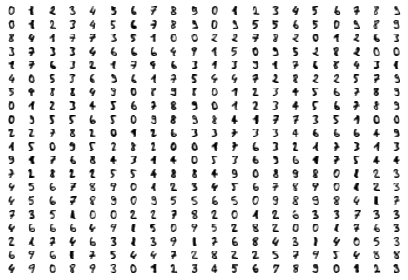

In [9]:
digits = load_digits()
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [57]:
reducer = umap.UMAP()
reducer.fit(digits.data)
umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)
embedding = reducer.transform(digits.data)
embedding.shape

(1797, 2)

In [61]:
# np.savetxt("embedding_digits.txt",embedding)

In [62]:
X = np.loadtxt("embedding_digits.txt")
p1 = [np.max(X[:,0])+1,np.max(X[:,1])+1]
p2 = [np.max(X[:,0])+1,np.min(X[:,1])-1]
p3 = [np.min(X[:,0])-1,np.min(X[:,1])-1]
p4 = [np.min(X[:,0])-1,np.max(X[:,1])+1]
X=np.concatenate((X,np.array([p1,p2,p3,p4])))
y=np.concatenate((digits.target,np.array([10,10,10,10])))
k=Delaunay(X)

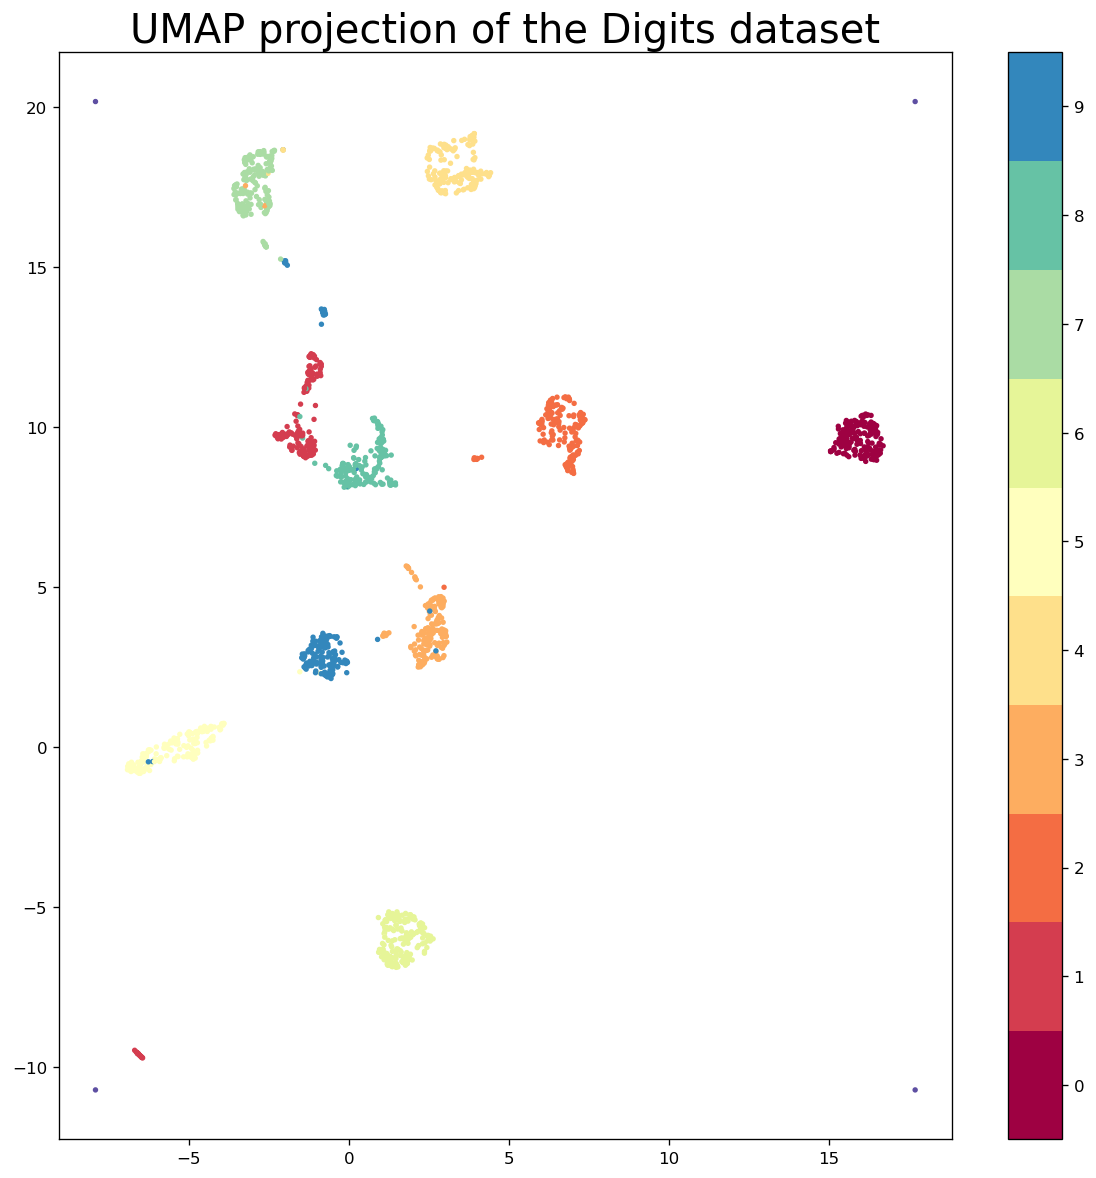

In [63]:
plt.figure(figsize=(12, 12), dpi=120)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

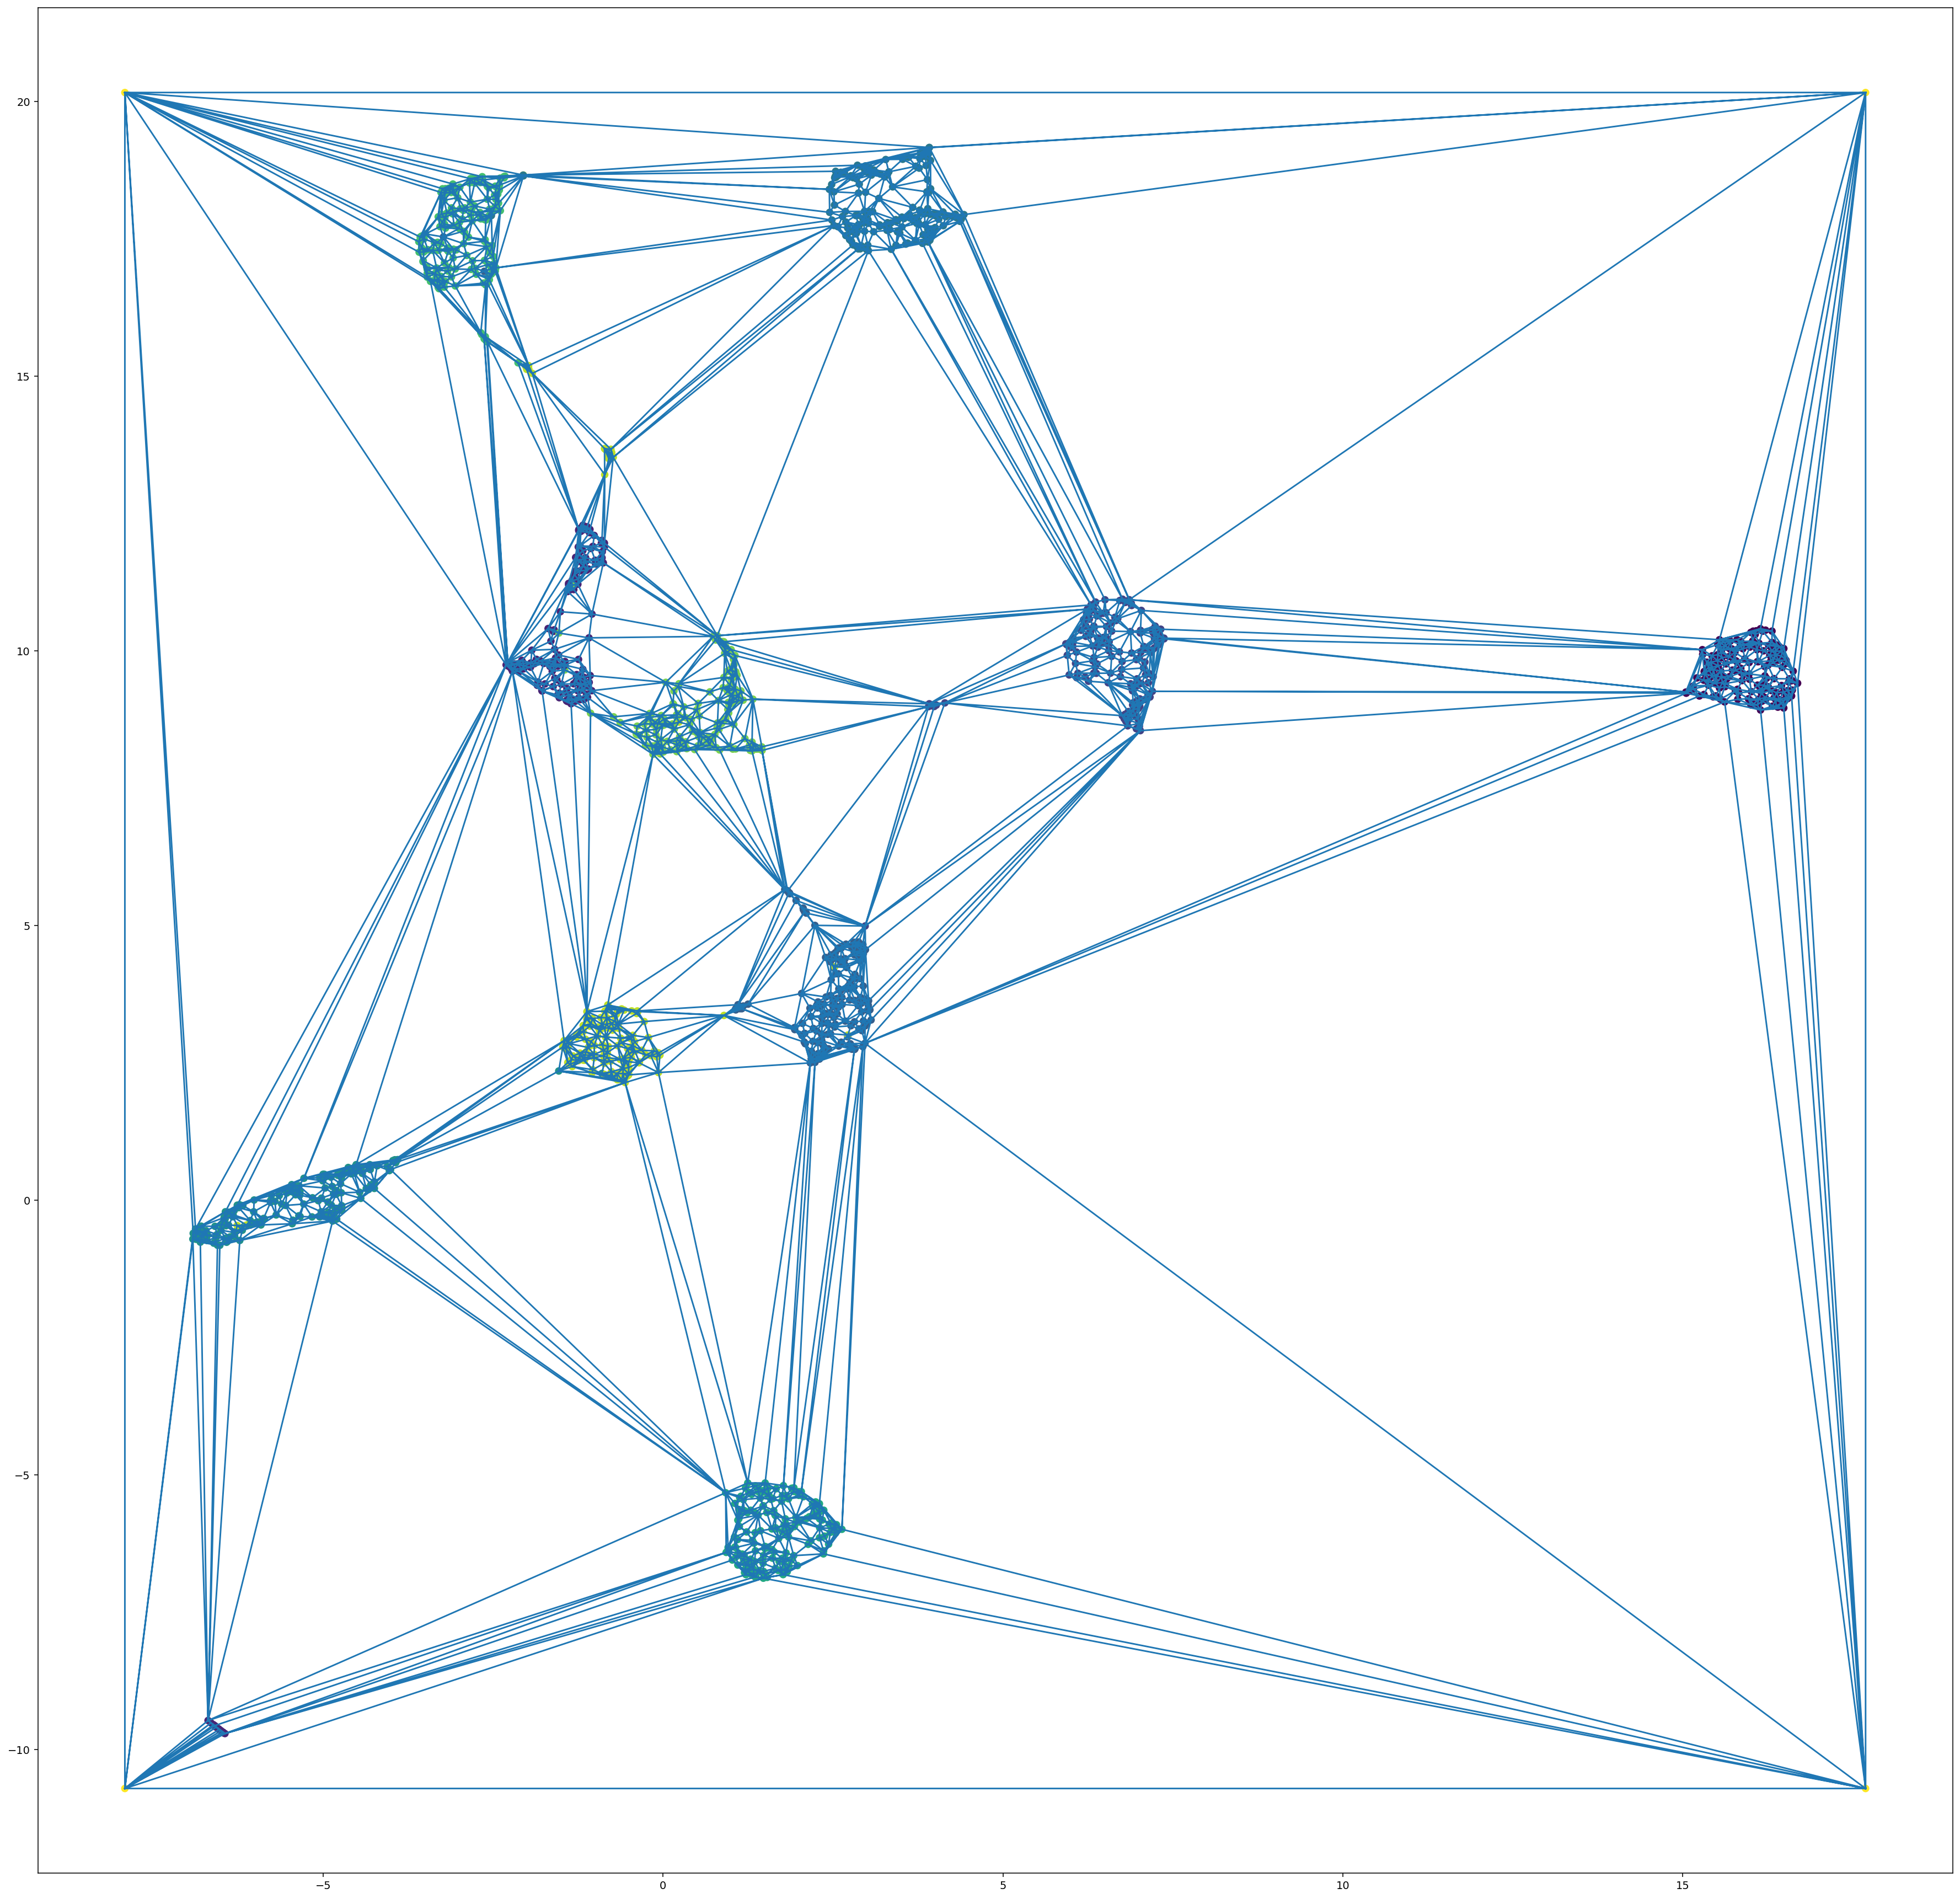

In [64]:
plt.figure(figsize=(32, 32), dpi=140)
plt.scatter(X[:,0],X[:,1],c=y)
plt.triplot(X[:,0], X[:,1], k.simplices)
plt.show()

In [65]:
k.simplices

array([[1576, 1800, 1799],
       [1798, 1163, 1799],
       [ 209, 1798, 1797],
       ...,
       [1460, 1110,  359],
       [1460, 1116, 1110],
       [1460, 1390, 1116]], dtype=int32)

In [66]:
y[k.simplices][35]

array([ 0,  0, 10])

Originalmente eran  3596  triángulos y  1801  puntos.


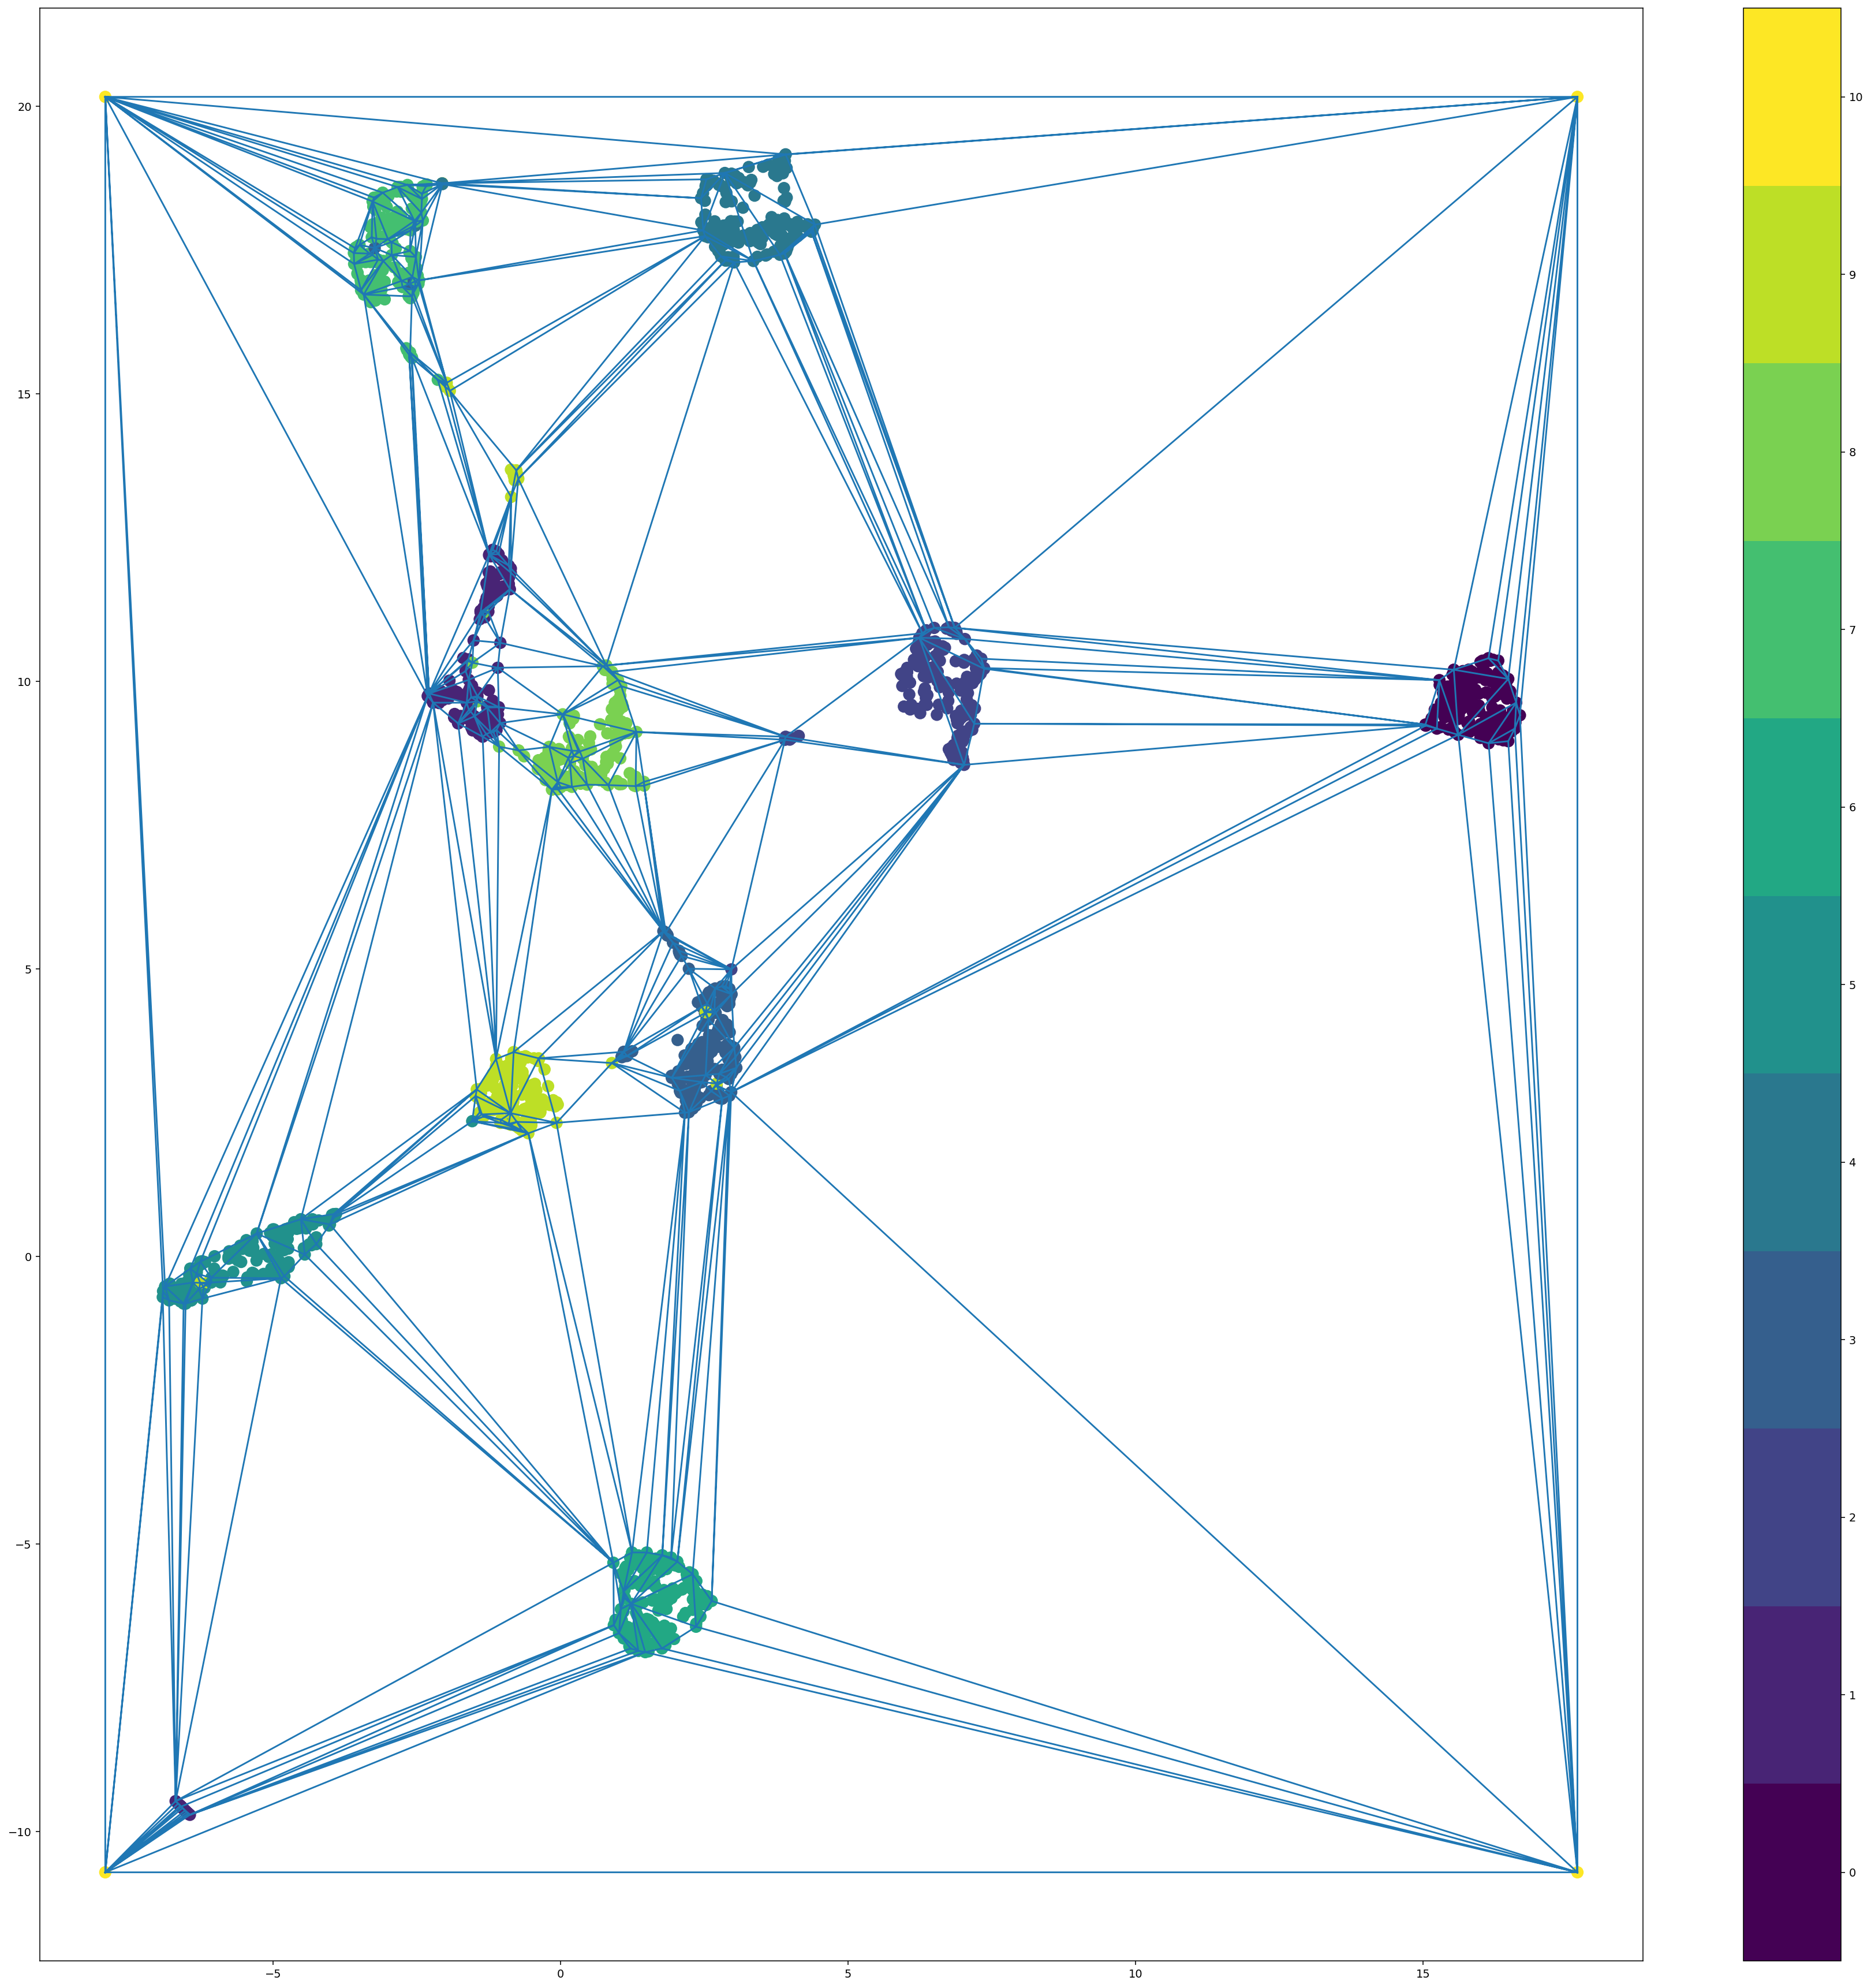

Son  604  triángulos en total tras la reducción.
Son  305  puntos en total tras la reducción.


In [67]:
print("Originalmente eran ",len(k.simplices)," triángulos y ",len(k.points)," puntos.")
pairs = zip(y[k.simplices],k.simplices)
triangulos=[y for (x,y) in pairs if len(set(x))!=1]
k.simplices=triangulos
puntos=k.points[np.unique(k.simplices)]
labels_puntos = y[np.unique(k.simplices)]
tr = Delaunay(puntos)
plt.figure(figsize=(32, 32), dpi=140)
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.triplot(puntos[:,0], puntos[:,1], tr.simplices)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(12)-0.5).set_ticks(np.arange(11))
plt.show()
print("Son ",len(tr.simplices), " triángulos en total tras la reducción.")
print("Son ",len(tr.points), " puntos en total tras la reducción.")

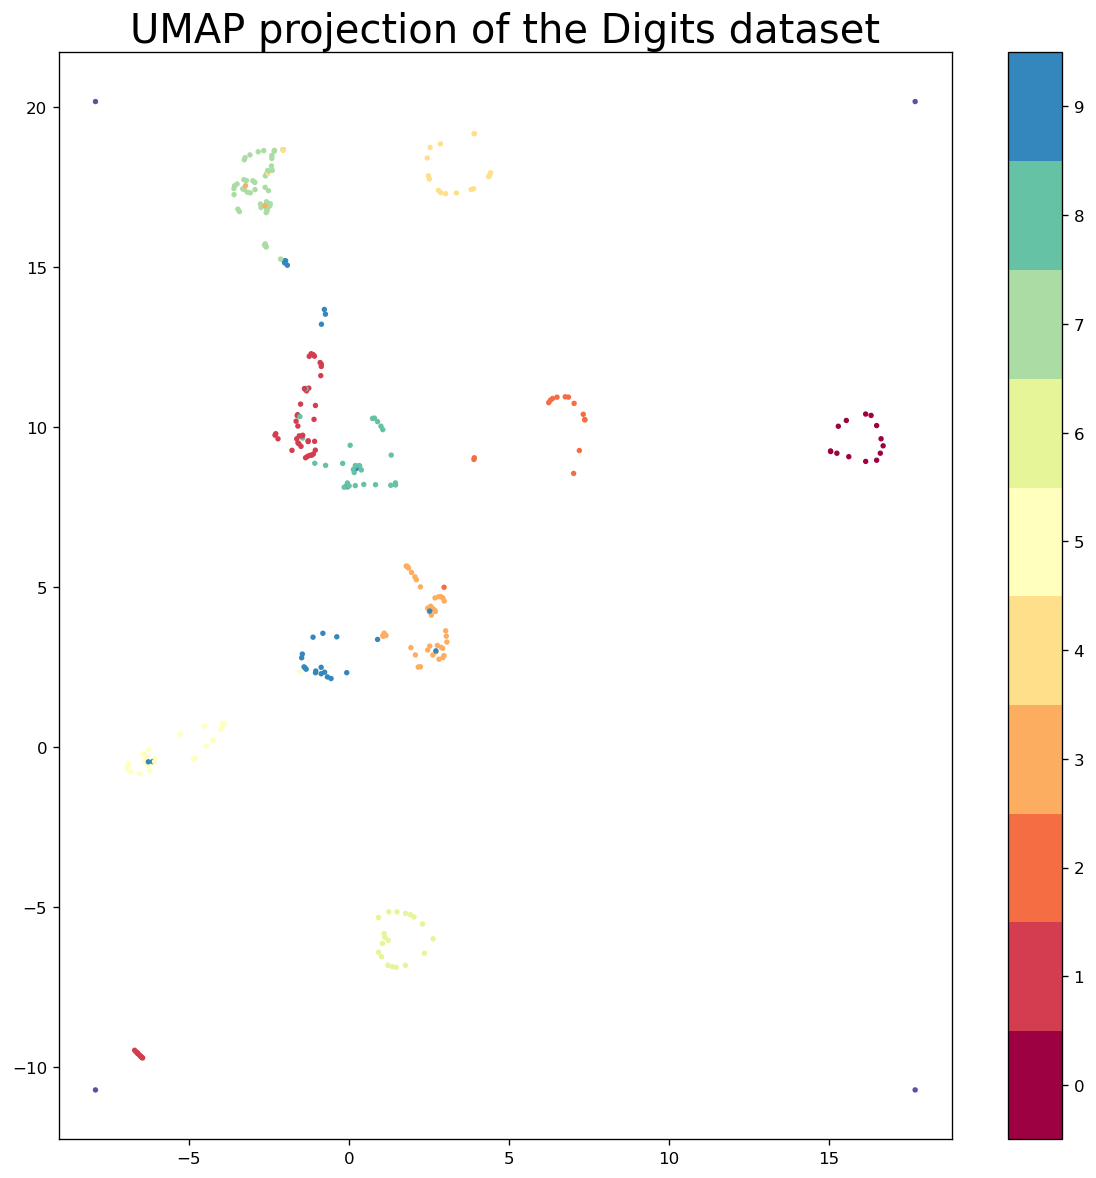

In [68]:
plt.figure(figsize=(12, 12), dpi=120)
plt.scatter(puntos[:, 0], puntos[:, 1], c=labels_puntos, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);